In [213]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

# scratch work

In [214]:
df = pd.read_csv("../Data/clean_df_engineering.csv")
df.drop(['Course'], axis=1, inplace=True)
df.head()

,Age,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,24,0,2.44,0,3,0,0.5,0.0,0.5,0.0,0.0,0.5,0.5,0,0,3,0.0,27,0.0
1,22,0,3.62,3,2,1,0.5,1.0,0.5,0.5,0.0,0.0,1.0,1,0,5,0.0,24,0.0
2,22,0,3.16,2,1,5,1.0,0.0,0.5,0.5,0.0,0.0,0.0,0,0,3,0.0,21,0.0
3,25,0,3.48,2,3,2,0.5,0.0,0.0,1.0,0.0,0.0,0.5,0,0,2,0.5,29,1.0
4,23,0,3.65,2,5,1,1.0,0.5,0.5,0.0,0.0,0.0,0.0,1,0,0,0.5,19,1.0


In [215]:
df['Depression_Score'] = df['Depression_Score'].apply(lambda x: 1 if x>4 else 0)
df.head()

,Age,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,24,0,2.44,0,0,0,0.5,0.0,0.5,0.0,0.0,0.5,0.5,0,0,3,0.0,27,0.0
1,22,0,3.62,3,0,1,0.5,1.0,0.5,0.5,0.0,0.0,1.0,1,0,5,0.0,24,0.0
2,22,0,3.16,2,0,5,1.0,0.0,0.5,0.5,0.0,0.0,0.0,0,0,3,0.0,21,0.0
3,25,0,3.48,2,0,2,0.5,0.0,0.0,1.0,0.0,0.0,0.5,0,0,2,0.5,29,1.0
4,23,0,3.65,2,1,1,1.0,0.5,0.5,0.0,0.0,0.0,0.0,1,0,0,0.5,19,1.0


In [216]:
X = df.drop(['Depression_Score'], axis=1)
# After feature selection:
# X = df.loc[:, ['Age', 'CGPA', 'Anxiety_Score', 'Semester_Credit_Load', 'Stress_Level', 'Financial_Stress']]
y = df['Depression_Score']

X_scaled = MinMaxScaler().fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, shuffle=True)

In [217]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

feature_importances = tree.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values('Importance', ascending=False)
feature_importances_df

Accuracy: 0.7528089887640449


,Feature,Importance
2,CGPA,0.220493
16,Semester_Credit_Load,0.105951
0,Age,0.100131
7,Diet_Quality,0.090248
8,Social_Support,0.074701
4,Anxiety_Score,0.070774
9,Relationship_Status,0.063245
11,Counseling_Service_Use,0.062260
5,Sleep_Quality,0.056463
14,Financial_Stress,0.027365


In [218]:
"""Random Forests"""

# n_estimators = the number of decision trees
# max_features = used to randomize the features. 

best_accuracy_rf = 0
n_for_best_accuracy_rf = 0
max_feat_for_best_accuracy_rf = 0

for n in range(10, 100, 5):
    for max_feat in ['sqrt']:
        # Create a Random Forest model
        random_forest = RandomForestClassifier(max_features=max_feat, n_estimators=n, random_state=42)
        random_forest.fit(X_train, y_train)

        # Predict and evaluate
        y_pred_rf = random_forest.predict(X_test)
        accuracy_rf = accuracy_score(y_test, y_pred_rf)
        print(f'Random Forest [n_estimators={n}, max_features={max_feat}] Accuracy: {accuracy_rf:.4f}')

        if accuracy_rf > best_accuracy_rf and accuracy_rf < 1.0:
            best_accuracy_rf = accuracy_rf
            n_for_best_accuracy_rf = n
            max_feat_for_best_accuracy_rf = max_feat
    print('---------------')


Random Forest [n_estimators=10, max_features=sqrt] Accuracy: 0.8801
---------------
Random Forest [n_estimators=15, max_features=sqrt] Accuracy: 0.8801
---------------
Random Forest [n_estimators=20, max_features=sqrt] Accuracy: 0.8764
---------------
Random Forest [n_estimators=25, max_features=sqrt] Accuracy: 0.8764
---------------
Random Forest [n_estimators=30, max_features=sqrt] Accuracy: 0.8801
---------------
Random Forest [n_estimators=35, max_features=sqrt] Accuracy: 0.8801
---------------
Random Forest [n_estimators=40, max_features=sqrt] Accuracy: 0.8801
---------------
Random Forest [n_estimators=45, max_features=sqrt] Accuracy: 0.8801
---------------
Random Forest [n_estimators=50, max_features=sqrt] Accuracy: 0.8801
---------------
Random Forest [n_estimators=55, max_features=sqrt] Accuracy: 0.8801
---------------
Random Forest [n_estimators=60, max_features=sqrt] Accuracy: 0.8801
---------------
Random Forest [n_estimators=65, max_features=sqrt] Accuracy: 0.8801
--------

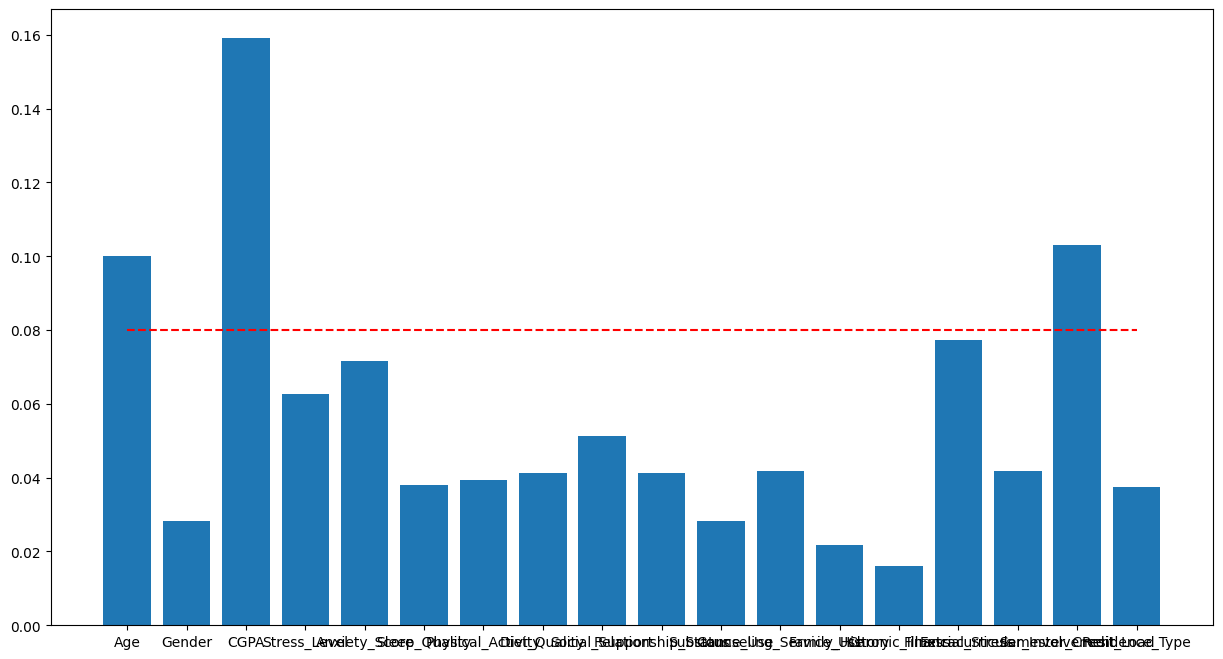

In [219]:
# for feature, importance in zip(X.columns, random_forest.feature_importances_):
#     print(f'{feature}:\t{importance}')
n_features = len(X.columns)

plt.figure(figsize=(15, 8))
plt.bar(X.columns, random_forest.feature_importances_)
plt.plot(X.columns, 0.08*np.ones(n_features), 'r--')


In [220]:
# feature importance order = cgpa, semester_credit_load, age, anxiety_score, stress_level, financial_stress, residence_type, physical_activity, social_support, relationship_status, extracurricular_involvement, sleep_quality, counseling_service_use, diet_quality, gender, family_history, substance_use, chronic_illness

### trying single variable feature importance detection

In [221]:
for col in X.columns:
    # X_svp = X.drop([col], axis=1)
    X_svp = X[[col]]
    y_svp = y
    X_train_svp, X_test_svp, y_train_svp, y_test_svp = train_test_split(X_svp, y_svp, test_size=0.25, random_state=42, shuffle=True)

    tree_svp = DecisionTreeClassifier(random_state=42)
    tree_svp.fit(X_train_svp, y_train_svp)
    y_pred_svp = tree_svp.predict(X_test_svp)
    accuracy_svp = accuracy_score(y_test_svp, y_pred_svp)
    # print(f'Prediction without {col}: {accuracy_svp}')
    print(f'Prediction with only {col}: {accuracy_svp}')

Prediction with only Age: 0.8801498127340824
Prediction with only Gender: 0.8801498127340824
Prediction with only CGPA: 0.8651685393258427
Prediction with only Stress_Level: 0.8801498127340824
Prediction with only Anxiety_Score: 0.8801498127340824
Prediction with only Sleep_Quality: 0.8801498127340824
Prediction with only Physical_Activity: 0.8801498127340824
Prediction with only Diet_Quality: 0.8801498127340824
Prediction with only Social_Support: 0.8801498127340824
Prediction with only Relationship_Status: 0.8801498127340824
Prediction with only Substance_Use: 0.8801498127340824
Prediction with only Counseling_Service_Use: 0.8801498127340824
Prediction with only Family_History: 0.8801498127340824
Prediction with only Chronic_Illness: 0.8801498127340824
Prediction with only Financial_Stress: 0.8801498127340824
Prediction with only Extracurricular_Involvement: 0.8801498127340824
Prediction with only Semester_Credit_Load: 0.8801498127340824
Prediction with only Residence_Type: 0.8801498

# Top 5: cgpa, semester_credit_load, age, anxiety_score, stress_level

# Cleaned up into functions

In [222]:
def get_best_rf_params(X_train, X_test, y_train, y_test, verbose=False):
    best_accuracy_rf = 0
    n_for_best_accuracy_rf = 0
    max_feat_for_best_accuracy_rf = 0

    for n in range(10, 100, 5):
        for max_feat in [1, 'log2', 'sqrt']:
            # Create a Random Forest model
            random_forest = RandomForestClassifier(max_features=max_feat, n_estimators=n, random_state=42)
            random_forest.fit(X_train, y_train)

            # Predict and evaluate
            y_pred_rf = random_forest.predict(X_test)
            accuracy_rf = accuracy_score(y_test, y_pred_rf)
            if verbose:
                print(f'Random Forest [n_estimators={n}, max_features={max_feat}] Accuracy: {accuracy_rf:.4f}')

            if accuracy_rf > best_accuracy_rf and accuracy_rf < 1.0:
                best_accuracy_rf = accuracy_rf
                n_for_best_accuracy_rf = n
                max_feat_for_best_accuracy_rf = max_feat
            
    return n_for_best_accuracy_rf, max_feat_for_best_accuracy_rf

def get_importance(filepath, importance_threshold=0.08, depression_threshold=3, scaler=MinMaxScaler(), test_split=0.30, verbose=False):
    # Dataset
    df = pd.read_csv(filepath)
    df.drop(['Course'], axis=1, inplace=True)
    df['Depression_Score'] = df['Depression_Score'].apply(lambda x: 1 if x>depression_threshold else 0)
    if verbose:
        print("="*25, "Dataset", "="*25)
        print(df.head())
        print('\n\n', "="*25, "Decision Tree", "="*25)

    X = df.drop(['Depression_Score'], axis=1)
    X_scaled = scaler.fit_transform(X)
    X = pd.DataFrame(X_scaled, columns=X.columns)
    y = df['Depression_Score']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_split, random_state=42, shuffle=True)

    # Decision Tree
    tree = DecisionTreeClassifier(random_state=42)
    tree.fit(X_train, y_train)

    y_pred = tree.predict(X_test)
    accuracy_dt = accuracy_score(y_test, y_pred)

    dt_feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': tree.feature_importances_})
    dt_feature_importances_df = dt_feature_importances_df.sort_values('Importance', ascending=False)
    if verbose:
        print("Accuracy:", accuracy_dt, '\n')
        print("Feature Importance:")
        print(dt_feature_importances_df)

        print('\n\n', "="*25, "Random Forest", "="*25)

    # Random Forest
    n, max_feat = get_best_rf_params(X_train, X_test, y_train, y_test, verbose)
    random_forest = RandomForestClassifier(max_features=max_feat, n_estimators=n, random_state=42)
    random_forest.fit(X_train, y_train)

    y_pred_rf = random_forest.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)

    rf_feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': random_forest.feature_importances_})
    rf_feature_importances_df = rf_feature_importances_df.sort_values('Importance', ascending=False)

    if verbose:
        print()
        print("Accuracy:", accuracy_rf, '\n')
        print("Feature Importance:")
        print(rf_feature_importances_df)

    features = X.columns
    n_features = len(features)

    fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,8))

    ax[0].bar(features, tree.feature_importances_)
    ax[0].plot(features, importance_threshold*np.ones(n_features), 'r--')
    ax[0].set_xticklabels(features, rotation=45)
    ax[0].set_title("Importance using Decision Tree")

    ax[1].bar(features, random_forest.feature_importances_)
    ax[1].plot(features, importance_threshold*np.ones(n_features), 'r--')
    ax[1].set_xticklabels(features, rotation=45)
    ax[1].set_title("Importance using Random Forest")

    plt.tight_layout()

# Sample Runs

========================= Dataset =========================
   Age  Gender  CGPA  Stress_Level  Depression_Score  Anxiety_Score  \
0   21       0  3.35             2                 1              3   
1   24       1  3.80             3                 0              1   
2   27       1  3.26             3                 0              2   
3   24       0  3.20             3                 0              3   
4   18       0  3.85             4                 0              3   

   Sleep_Quality  Physical_Activity  Diet_Quality  Social_Support  \
0            1.0                0.5           1.0             1.0   
1            0.0                0.0           0.5             0.5   
2            0.5                0.5           0.5             1.0   
3            0.5                0.0           0.0             0.5   
4            1.0                0.0           0.5             0.5   

   Relationship_Status  Substance_Use  Counseling_Service_Use  Family_History  \
0                

C:\Users\123an\AppData\Local\Temp\ipykernel_29572\2975252439.py:82: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(features, rotation=45)
C:\Users\123an\AppData\Local\Temp\ipykernel_29572\2975252439.py:87: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(features, rotation=45)


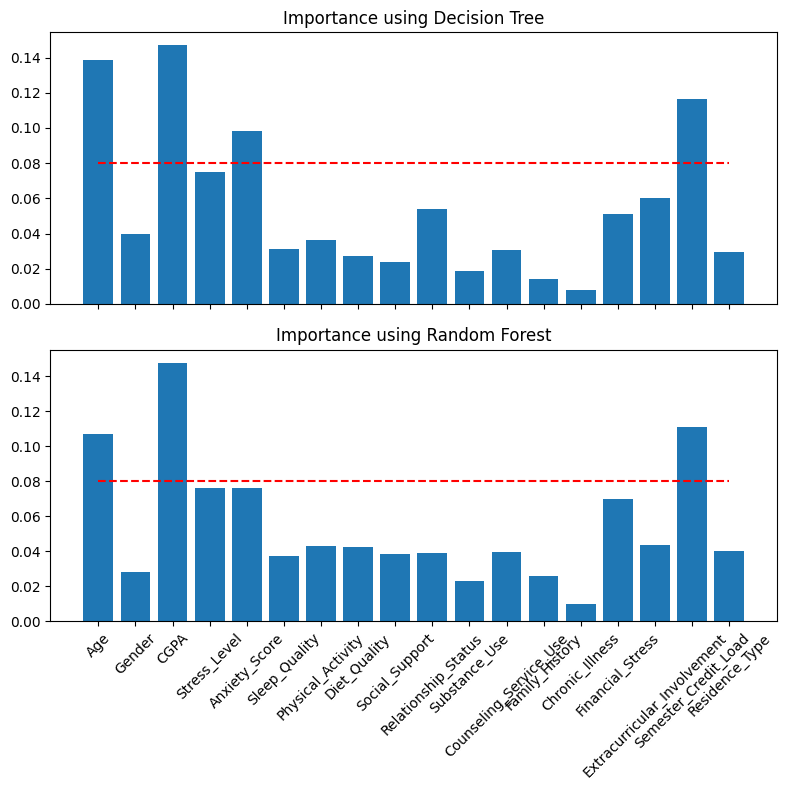

In [223]:
get_importance("../Data/clean_df_medical.csv", verbose=True)